# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier

# Подготовка и анализ данных

In [2]:
df=pd.read_csv("chronic_kidney_disease.csv")
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.shape

(400, 25)

Датасет представлен 25 столбцами, отражающими влияние значений ряда медицинских показателей на возникновение хронической болезни почек у пациента. Целевая переменная (класс) зависит от возраста, давления крови, удельного веса жидкости, уровня альбумина, сахара в крови, уровня красных кровяных телец, гнойных клеток и сгустков, бактерий, случайного уровня глюкозы, наличия мочевины, креатинина, натрия, калия в крови, уровня гемоглобина, объема клеток, числа лейкоцитов и эритроцитов, наличия гипертонии, сахарного диабета, ишемической болезни сердца, аппетита, отека стоп и анемии. 
В датасете 400 строк и 25 столбцов. При этом пустые значения отражаются как "?".
Требуется построить модель классификации болезни почек пациента (есть/нет) на основании приведенных показателей. Иследуем характеристики данных.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wc      400 non-null    object
 17  rc      400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

### 1. Работа с типами данных

In [5]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,43,90,49,3,4,3,3,3,3,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,106,131,251,261,364,317,323,339,250


Все данные имеют объектный (неопределенный или строчный) тип, что может быть связано с типом заполнения пропусков как "?". 
Для столбцов с качественными данными рассмотрим характеристики значений. Уровень кровяных телец и гнойных клеток оценивается как нормальный/ненормальный, преобладает нормальный. Гнойные сгустки и бактерии в основном не присутствуют в анализах пациентов. Наличие гипертонии, диабета, ишемической болезни сердца, отека стоп и анемии оценивается критерием да/нет, у 2/3 пациентов указанные болезни отсутствуют. Целевая переменная класс имеет вид ckd/notckd, 5/8 пациентов больны.
Для корректного определения типов данных рассмотрим уникальные значения, формирующие каждый столбец.

In [6]:
for col in df:
    print(f"{col} consists from {df[col].unique()}")

age consists from ['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '?' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79']
bp consists from ['80' '50' '70' '90' '?' '100' '60' '110' '140' '180' '120']
sg consists from ['1.020' '1.010' '1.005' '1.015' '?' '1.025']
al consists from ['1' '4' '2' '3' '0' '?' '5']
su consists from ['0' '3' '4' '1' '?' '2' '5']
rbc consists from ['?' 'normal' 'abnormal']
pc consists from ['normal' 'abnormal' '?']
pcc consists from ['notpresent' 'present' '?']
ba consists from ['notpresent' 'present' '?']
bgr consists from ['121' '?' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '173' '95' '108' '156' '264' '123' '93'
 '107' '159' '14

Для столбцов с числовыми значениями проведем преобразование в числовой тип, предусмотрев обработку пропусков с заменой на пустое значение.

In [7]:
num_list=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
for col in num_list:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


Числовые столбцы характеризуются следующими статистиками. Возраст пациентов распределен от 2 до 90 лет со средним 51 год. Артериальное давление от 50 до 180 мм/рт ст, 3/4 значений не превышают 80. Уровни альбумина и сахара оцениваются от 0 до 5, модальное значение-0. Удельный вес жидкости находится в диапазоне от 1 до 1,3. Концентрация глюкозы составляет в среднем 148 мг/дл с СКО 79, концентрация мочевины - 57 мг/дл  с СКО 50, креатинина - 3 мг/дл с СКО 6. Уровень натрия составляет в среднем 138 единиц в мг-экв/л., калия - 5 единиц в мг-экв/л. Гемоглобин составляет от 3 до 18, среднее-12,5. Объем упакованных клеток в среднем 39, лейкоцитов 8400 шт, эритроцитов в среднем 5 шт.

Для дальнейшего учета моделью значений качественных признаков необходимо перекодировать их. Выполним замену оценок с помощью словаря исходя из следующей логики: нормальное значение-0; девиация, способная оказать влияние на возникновение болезни-1; пропуски отразим как NaN.

In [9]:
norm_dict={
    'normal':0,
    'abnormal':1, 
    '?':np.nan
}
norm_list=['rbc','pc']
for col in norm_list:
    df[col] = df[col].map(norm_dict)

In [10]:
pres_dict={
    'notpresent':0,
    'present':1,
    '?':np.nan
}
pres_list=['pcc','ba']
for col in pres_list:
    df[col] = df[col].map(pres_dict)


In [11]:
yes_dict={
    'no':0,
    'yes':1,
    ' yes':1,
    '?':np.nan
}
yes_list=['htn','dm','cad','pe','ane']
for col in yes_list:
    df[col] = df[col].map(yes_dict)

In [12]:
appet_dict={
    'good':0,
    'poor':1,
    '?':np.nan
}
df.appet=df.appet.map(appet_dict)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wc      294 non-null    float64
 17  rc      269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

Типы данных преобразованы, в датасете присутствует значительное число пропусков. Исследуем графически распределение данных.

### 2. Визуализация и анализ связей 

Text(0.5, 1.0, 'Распределение факторов')

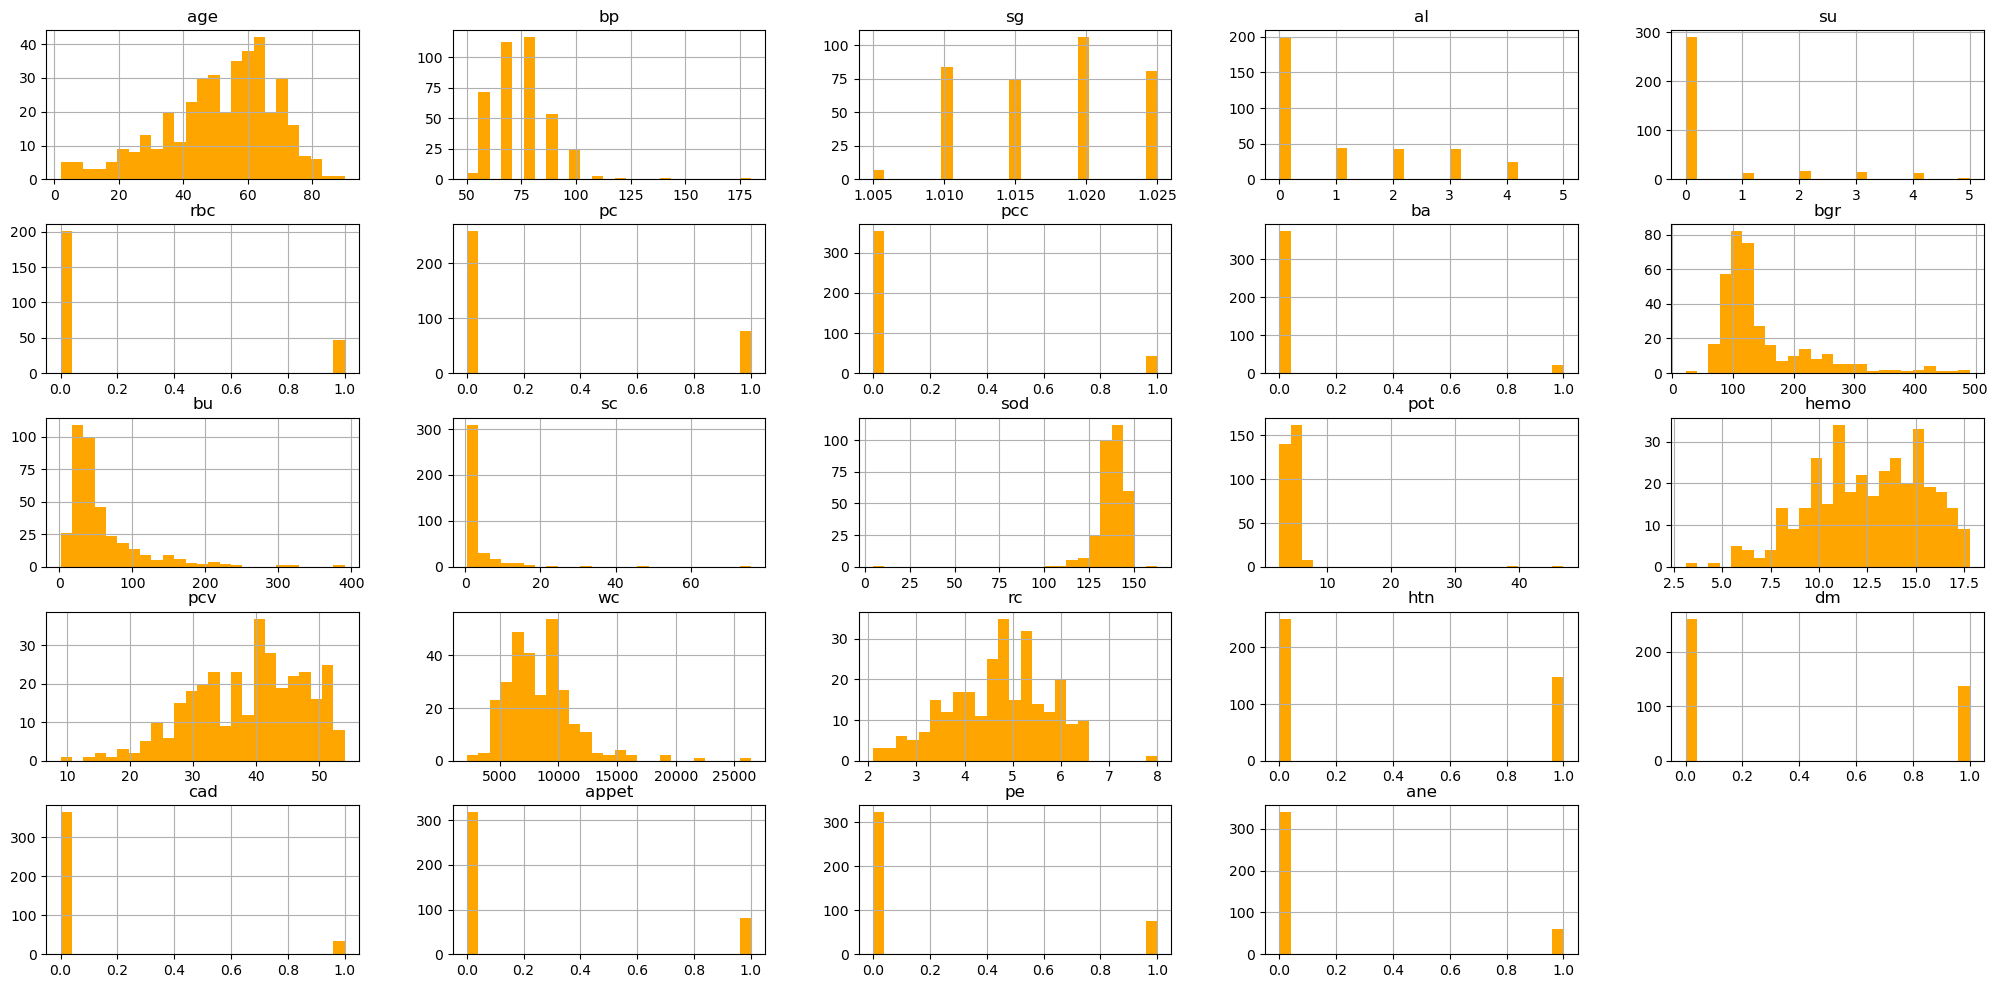

In [14]:
df.hist(bins=25,figsize=(25,12),color='orange')
plt.title("Распределение факторов")

Распределение возраста, гемоглобина, объема упаковочных клеток, уровня натрия близко к смещенному вправо нормальному, уровня глюкозы, креатинина, мочевины, калия, лейкоцитов и эритроцитов-смещенному влево нормальному/геометрическому. Для остальных показателей гистограмма отражает преобладание определенного дискретного значения показателя.

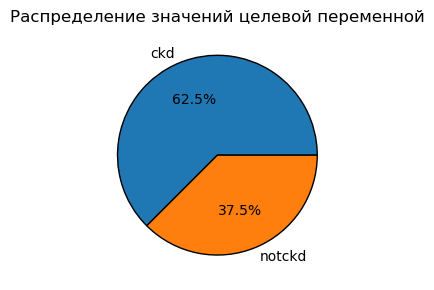

In [15]:
plt.figure(figsize=[4,3])
cl_count=df['class'].value_counts()
cl_label=df['class'].value_counts().index
plt.pie(cl_count,labels=cl_label,wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.title("Распределение значений целевой переменной")
plt.tight_layout()
plt.show()

В результате воздействия факторов в генеральной совокупности значения заболеваемости соотносятся как 5:3.

In [16]:
pd.pivot_table(df, 
               index=['class'], 
               values=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','rbc','pc', 'pcc','ba', 'htn','dm','cad','pe','ane','appet'],
               aggfunc=[np.mean])

mean                                                       \
              age        al   ane  appet     ba         bgr         bp   
class                                                                    
ckd     54.541322  1.722488  0.24  0.328  0.088  175.419811  79.625000   
notckd  46.516779  0.000000  0.00  0.000  0.000  107.722222  71.351351   

                                 ...                                        \
               bu    cad     dm  ...        pcv     pe       pot       rbc   
class                            ...                                         
ckd     72.389030  0.136  0.548  ...  32.939891  0.304  4.878443  0.439252   
notckd  32.798611  0.000  0.000  ...  46.335616  0.000  4.337931  0.000000   

                                                                        
              rc        sc        sg         sod       su           wc  
class                                                                   
ckd     3.945238  4.414916  1.013918  133.901786  0.76699  9069.536424  
notckd  5.379021  0.868966  1.022414  141.731034  0.00000  7705.594406  

[2 rows x 24 columns]

С промощью сводной таблицы можно выявить ряд закономерностей в данных. Люди, у которых отсутствует болезнь почек, как правило, моложе, без других хронических заболеваний, показатели количества элементов в крови ниже, микроэлементов-выше. 

Для оценки корреляции также преобразуем целевой признак в число.

In [17]:
df['class'] = df['class'].map({'ckd': 0, 'notckd': 1})

Матрица корреляции имеет вид:

In [18]:
corr_matryx=df.corr()
corr_matryx.style.background_gradient(cmap='coolwarm', axis=None)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.079987,0.150867,0.157693,0.042160,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.400254,0.369420,0.233560,0.161168,0.097621,0.053346,-0.227268
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.294129,0.189310,0.057891,0.111204,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.271301,0.228946,0.085602,0.177914,0.054045,0.197345,-0.294077
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.395774,-0.374407,-0.291618,-0.220656,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.400085,-0.431046,-0.174722,-0.268498,-0.298618,-0.242699,0.732163
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.437873,0.558535,0.401284,0.368373,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.525756,0.413609,0.268324,0.357455,0.477274,0.321187,-0.627090
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.164609,0.202815,0.151222,0.107047,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.321933,0.523372,0.279979,0.087417,0.143085,0.075233,-0.344070
rbc,0.079987,0.294129,-0.395774,0.437873,0.164609,1.000000,0.426395,0.110282,0.180657,0.293097,0.288021,0.301159,-0.346578,-0.035086,-0.471575,-0.447670,-0.004201,-0.381538,0.306579,0.339051,0.193730,0.282708,0.302234,0.189951,-0.555097
pc,0.150867,0.189310,-0.374407,0.558535,0.202815,0.426395,1.000000,0.514578,0.329655,0.329612,0.435700,0.356734,-0.358833,0.185211,-0.541903,-0.541718,0.134303,-0.548112,0.383096,0.301557,0.215118,0.316625,0.415723,0.329643,-0.461812
pcc,0.157693,0.057891,-0.291618,0.401284,0.151222,0.110282,0.514578,1.000000,0.274491,0.208856,0.183243,0.048553,-0.180640,-0.008385,-0.285726,-0.312942,0.189944,-0.350248,0.192673,0.162261,0.186738,0.187932,0.102485,0.174364,-0.263226
ba,0.042160,0.111204,-0.220656,0.368373,0.107047,0.180657,0.329655,0.274491,1.000000,0.093582,0.157487,0.049837,-0.089411,-0.003232,-0.219461,-0.208454,0.117600,-0.231433,0.086668,0.077761,0.161461,0.147872,0.133500,0.051001,-0.185345
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,0.293097,0.329612,0.208856,0.093582,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.390203,0.526326,0.228829,0.185179,0.108686,0.140121,-0.419672


На определение класса наибольшим образом влияют уровень жидкости в органах, уровень гемоглобина, объем упаковочных клеток и уровень эритроцитов (связь более 0,7, сильная). Обратная связь заболевания почек на уровне -0,5 зафиксирована с уровнем альбумина, красных кровяных телец, гнойных клеток, наличием гипертонии и диабета. С остальными факторами у целевой переменной связь слабая. Фиксируется также наличие межфакторной корреляции у ряда признаков, что может ухудшить качество модели классификации. 

### 3. Обработка пропущенных значений

In [19]:
df.isna().sum().sort_values(ascending = False)

rbc      152
rc       131
wc       106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

В датасете присутствует значительное число пропусков. Для их заполнения предлагается следующий подход. Исходя из факта смещенности гистограмм распределения ряда признаков предлагается их заполнение медианой ряда, для признаков с дискретной оценкой заполнение будет проводиться по моде ряда.

In [20]:
med_list=['age','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
for col in med_list:
    df[col]=df[col].fillna(df[col].median())

In [21]:
mod_list=['bp','sg','al','su','rbc','pc', 'pcc','ba', 'htn','dm','cad','pe','ane','appet']
for col in mod_list:
    df[col]=df[col].fillna(df[col].mode()[0])

Таким образом, все пропуски заполнены.

In [22]:
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

Данные подготовлены для создания модели:

In [23]:
y = df.pop('class')
X = df

In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [25]:
X 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,11.3,38.0,6000.0,4.8,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,9.6,31.0,7500.0,4.8,0.0,1.0,0.0,1.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Подбор модели классификации

### 1. Логистическая регрессия

Модель логистической регрессии с исходными настройками показывает высокий результат (увеличение числа итераций было произведено по рекомендации модели, accuracy увеличилась с 0,92 до 0,98).

In [47]:
LR= LogisticRegression(max_iter=2000)
LR.fit(X_train, y_train)
tr_ac_LR=LR.score(X_train, y_train)
te_ac_LR=LR.score(X_test, y_test)
cr_ac_LR=np.mean(cross_val_score(LR, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_LR),'; accuracy for test set= {:.4f}'.format(te_ac_LR),'; cross-validation accuracy= {:.4f}'.format(cr_ac_LR))

accuracy for train set= 0.9844 ; accuracy for test set= 0.9750 ; cross-validation accuracy= 0.9800


Подбор гиперпараметров для данной модели осуществлен с помощью поиска по сетке:

In [28]:
params = {'C':[100, 10, 1, 0.1, 0.01,0.001],
          'penalty':['l1', 'l2'],
        'solver':['newton-cg', 'lbfgs', 'liblinear']}
gr_LR = GridSearchCV(LR, params, cv = 5)
gr_LR.fit(X,y)
gr_LR.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of itera

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The 

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [61]:
LR1 = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 100, max_iter=4000)
LR1.fit(X_train, y_train)
tr_ac_LR1=LR1.score(X_train, y_train)
te_ac_LR1=LR1.score(X_test, y_test)
cr_ac_LR1=np.mean(cross_val_score(LR1, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_LR1),'; accuracy for test set= {:.4f}'.format(te_ac_LR1),'; cross-validation accuracy= {:.4f}'.format(cr_ac_LR1))

accuracy for train set= 1.0000 ; accuracy for test set= 0.9875 ; cross-validation accuracy= 0.9775


Модель с подобранными гиперпараметрами показывает accuracy на трейне 1, хотя тестовые значения ниже, может присутствовать склонность к переобучению, потому коэффициент С целесообразно уменьшать. Проверены другие настройки, при С=90 или penalty=L1 accuracy на тесте и валидации 0,97 и 0,96.
Посмотрим, как на метрике скажется усложнение модели:

In [50]:
LPR = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                         ('scaler', StandardScaler()),
                         ('regression', LogisticRegression(penalty = 'l1', solver = 'liblinear',C = 10, max_iter=1500))])
LPR.fit(X_train, y_train)
tr_ac_LPR=LPR.score(X_train, y_train)
te_ac_LPR=LPR.score(X_test, y_test)
cr_ac_LPR=np.mean(cross_val_score(LPR, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_LPR),'; accuracy for test set= {:.4f}'.format(te_ac_LPR),'; cross-validation accuracy= {:.4f}'.format(cr_ac_LPR))

accuracy for train set= 1.0000 ; accuracy for test set= 0.9875 ; cross-validation accuracy= 0.9900


 Параметры модели были подобраны вручную. Техническая возможность подбора гиперпараметров по сетке отсутствует, тк не удается на компьютере обработать код поиска степени полинома и параметров логистической регрессии. Метрики этой модели самые высокие.

Таким образом, модель логистической регрессии показывает высокие метрики качества применительно к задаче. Лучшее для модели LPR accuracy на тесте 0,988, при кросс-валидации-0,99. Матрица несоответствий для модели LPR:

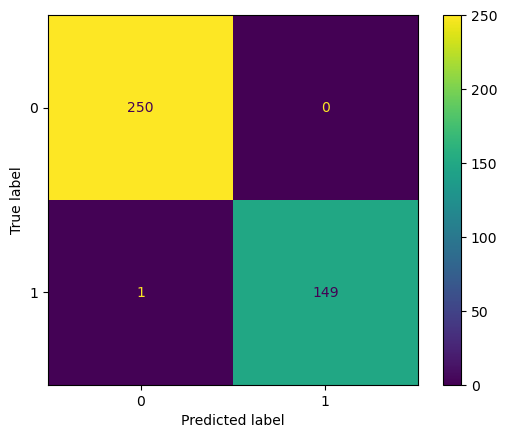

In [62]:
predictions = LPR.predict(X)
cm = confusion_matrix(y, predictions, labels= LPR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= LPR.classes_)
disp.plot()
plt.show()

Качество полученной модели очень высокое, существует вероятность переобучения, потому целесообразно рассмотреть другие типы моделей.

### 2. Метод опорных векторов

Применение метода опорных векторов с линейным ядром дает схожий высокий результат, так как зависимость между переменными близка к линейной:

In [68]:
LSVC = LinearSVC(dual=False,max_iter=5000)
LSVC.fit(X_train, y_train)
tr_ac_LSVC=LSVC.score(X_train, y_train)
te_ac_LSVC=LSVC.score(X_test, y_test)
cr_ac_LSVC=np.mean(cross_val_score(LSVC, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_LSVC),'; accuracy for test set= {:.4f}'.format(te_ac_LSVC),'; cross-validation accuracy= {:.4f}'.format(cr_ac_LSVC))

accuracy for train set= 0.9812 ; accuracy for test set= 1.0000 ; cross-validation accuracy= 0.9775


Подбор гиперпараметров:

In [69]:
params = {'C':[100, 10, 1, 0.1, 0.01,0.001],
          'penalty':['l1', 'l2']}
gr_LSVC = GridSearchCV(LSVC, params, cv = 5)
gr_LSVC.fit(X,y)
gr_LSVC.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 100, 'penalty': 'l2'}

In [52]:
LSVC1 = LinearSVC(C= 100, penalty= 'l2',dual=False, max_iter=5500)
LSVC1.fit(X_train, y_train)
tr_ac_LSVC1=LSVC1.score(X_train, y_train)
te_ac_LSVC1=LSVC1.score(X_test, y_test)
cr_ac_LSVC1=np.mean(cross_val_score(LSVC1, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_LSVC1),'; accuracy for test set= {:.4f}'.format(te_ac_LSVC1),'; cross-validation accuracy= {:.4f}'.format(cr_ac_LSVC1))

accuracy for train set= 0.9781 ; accuracy for test set= 0.9625 ; cross-validation accuracy= 0.9800


При рекомендованном выборе параметра неверности двойного решателя, так как n_samples > n_features, качество модели значительно увеличилось. Также проверено, что стандартизация не улучшает метрики этой модели.

Рассмотрим возможность применения метода опорных векторов с другими настройками ядра:

In [53]:
SVC1 = SVC(max_iter=5000)
SVC1.fit(X_train, y_train)
tr_ac_SVC1=SVC1.score(X_train, y_train)
te_ac_SVC1=SVC1.score(X_test, y_test)
cr_ac_SVC1=np.mean(cross_val_score(SVC1, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_SVC1),'; accuracy for test set= {:.4f}'.format(te_ac_SVC1),'; cross-validation accuracy= {:.4f}'.format(cr_ac_SVC1))

accuracy for train set= 0.6125 ; accuracy for test set= 0.6750 ; cross-validation accuracy= 0.6250


Подбор гиперпараметров:

In [36]:
params = {'degree': [1,3,5],
          'C': [0.01,0.1,1, 10,100], 
          'kernel': ['rbf', 'poly','sigmoid']}
gr_SVC = GridSearchCV(SVC1, params, cv = 5)
gr_SVC.fit(X,y)
gr_SVC.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5

{'C': 100, 'degree': 1, 'kernel': 'rbf'}

Согласно полученному предупреждению, решатель прерывается, требуется масштабирование:

In [71]:
SVC2 = Pipeline([('scaler', MinMaxScaler()),
                 ('svm', SVC(C= 100, degree= 1, kernel='rbf',max_iter=5000))])
SVC2.fit(X_train, y_train)
tr_ac_SVC2=SVC2.score(X_train, y_train)
te_ac_SVC2=SVC2.score(X_test, y_test)
cr_ac_SVC2=np.mean(cross_val_score(SVC2, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_SVC2),'; accuracy for test set= {:.4f}'.format(te_ac_SVC2),'; cross-validation accuracy= {:.4f}'.format(cr_ac_SVC2))

accuracy for train set= 1.0000 ; accuracy for test set= 0.9875 ; cross-validation accuracy= 0.9950


Применение метода опорных векторов с ядром в виде радиально-базисной функции показывает accuracy на тесте 0,988, на кросс-валидации 0,995, что является очень высоким результатом.

Таким образом, среди моделей, построенных по методу опорных векторов, лучшими оказались модель с линейным ядром с исходными настройками (accuracy на тесте 1, при кросс-валидации-0,978) LSVC:

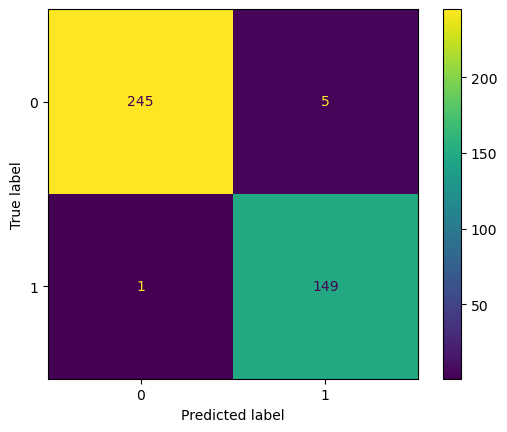

In [72]:
predictions = LSVC.predict(X)
cm = confusion_matrix(y, predictions, labels= LSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= LSVC.classes_)
disp.plot()
plt.show()

Хорошими метриками обладает также модель с ядром-радиально-базисной функцией SVC2:

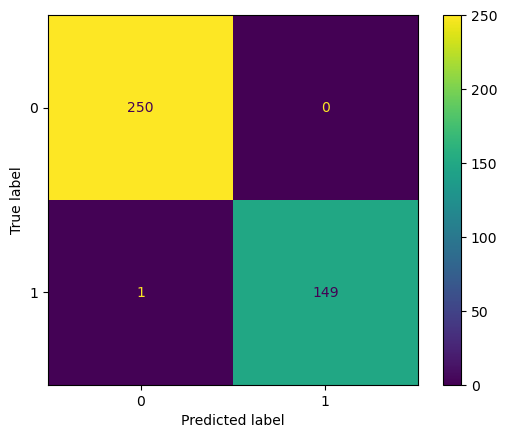

In [73]:
predictions = SVC2.predict(X)
cm = confusion_matrix(y, predictions, labels= SVC2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= SVC2.classes_)
disp.plot()
plt.show()

Качество последней модели аналогично качеству модели логистической регрессии.

### 3. Наивный Байес

Оценим также возможность применения к данным гауссовского наивного байесовского классификатора:

In [56]:
NBG = GaussianNB(var_smoothing=1e-10)
NBG.fit(X_train, y_train)
tr_ac_NBG=NBG.score(X_train, y_train)
te_ac_NBG=NBG.score(X_test, y_test)
cr_ac_NBG=np.mean(cross_val_score(NBG, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_NBG),'; accuracy for test set= {:.4f}'.format(te_ac_NBG),'; cross-validation accuracy= {:.4f}'.format(cr_ac_NBG))

accuracy for train set= 0.9625 ; accuracy for test set= 0.9750 ; cross-validation accuracy= 0.9650


Метрика accuracy на тестовом множестве принимает значение 0,95, на кросс-валидации 0,965, что свидетельствует о высоком качестве модели.

In [58]:
NBG1 = Pipeline([('scaler',StandardScaler()),
                ('nb', GaussianNB(var_smoothing=1e-20))])
NBG1.fit(X_train, y_train)
tr_ac_NBG1=NBG1.score(X_train, y_train)
te_ac_NBG1=NBG1.score(X_test, y_test)
cr_ac_NBG1=np.mean(cross_val_score(NBG1, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_NBG1),'; accuracy for test set= {:.4f}'.format(te_ac_NBG1),'; cross-validation accuracy= {:.4f}'.format(cr_ac_NBG1))

accuracy for train set= 0.9625 ; accuracy for test set= 0.9750 ; cross-validation accuracy= 0.9650


Стандартизация не обеспечивает улучшение метрик.

Так как ряд значений медицинских показателей, влияющих на классификацию, непрерывный, применение MultinomialNB нецелесообразно.

Вывод- модель NBG менеее точная, чем построенные ранее, тк ряд отрицательных значений распознан неправильно:

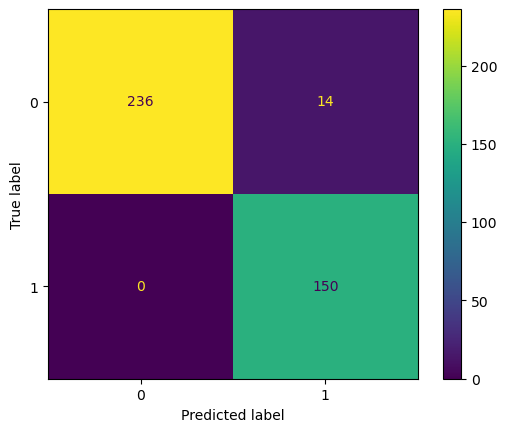

In [75]:
predictions = NBG1.predict(X)
cm = confusion_matrix(y, predictions, labels= NBG1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= NBG1.classes_)
disp.plot()
plt.show()

### 4. Дерево решений

Построим дерево решений для определения класса:

In [59]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
tr_ac_DT=DT.score(X_train, y_train)
te_ac_DT=DT.score(X_test, y_test)
cr_ac_DT=np.mean(cross_val_score(DT, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_DT),'; accuracy for test set= {:.4f}'.format(te_ac_DT),'; cross-validation accuracy= {:.4f}'.format(cr_ac_DT))

accuracy for train set= 1.0000 ; accuracy for test set= 0.9625 ; cross-validation accuracy= 0.9750


Визуализация DT с исходными параметрами, accuracy=0,98:

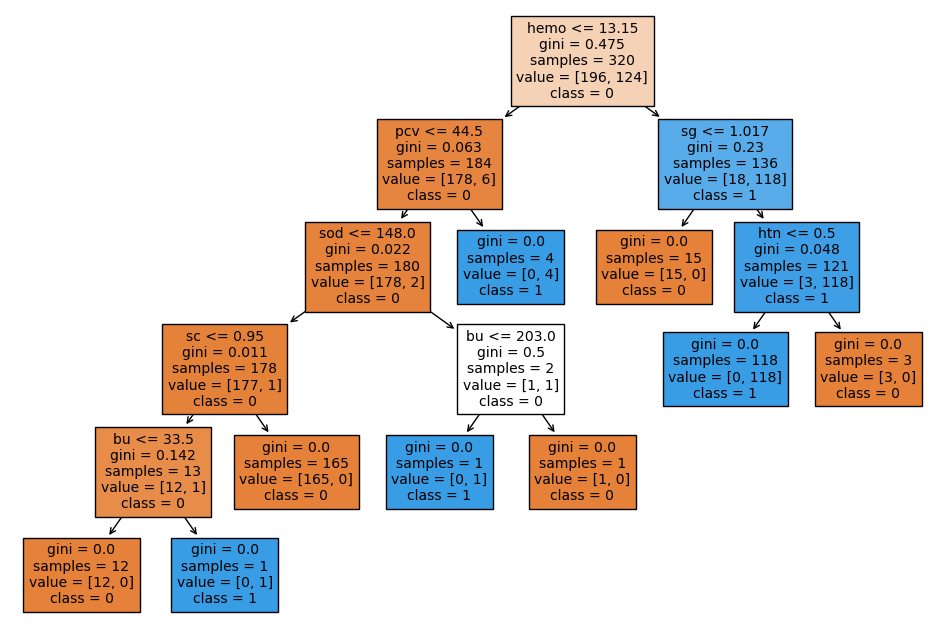

In [42]:
plt.figure(figsize=(12,8))
plot_tree(DT, 
          feature_names=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'], 
          class_names=['0', '1'],
          filled=True)
plt.show()

Для настройки гиперпараметров модели был произведен поиск по сетке критерия качества разделения, максимальной глубины разделения узлов дерева, сплиттера для выбора разделения, минимального числа выборок в узле, минимального числа выборок для разделения узла, числа учитываемых для разделения признаков. 

In [43]:
params = {'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1.0, 2, 3, 5, 7],
    'max_features' : [None, 'sqrt', 'log2']}
gr_DT = GridSearchCV(DT, params, cv = 5)
gr_DT.fit(X,y)
gr_DT.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

Дальнейшее изменение гиперпараметров ухудшает метрику на тестовом или валидационном множестве, метрики несколько хуже, чем у начальной модели.

In [77]:
DT1 = DecisionTreeClassifier(criterion='gini',max_depth=7, max_features= None, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
DT1.fit(X_train, y_train)
tr_ac_DT1=DT1.score(X_train, y_train)
te_ac_DT1=DT1.score(X_test, y_test)
cr_ac_DT1=np.mean(cross_val_score(DT1, X, y, cv = 5))
print('accuracy for train set= {:.4f}'.format(tr_ac_DT1),'; accuracy for test set= {:.4f}'.format(te_ac_DT1),'; cross-validation accuracy= {:.4f}'.format(cr_ac_DT1))

accuracy for train set= 0.9969 ; accuracy for test set= 0.9375 ; cross-validation accuracy= 0.9625


Таким образом, модель дерева решений DT также может применяться для решения задачи классификации с высокой степенью качества:

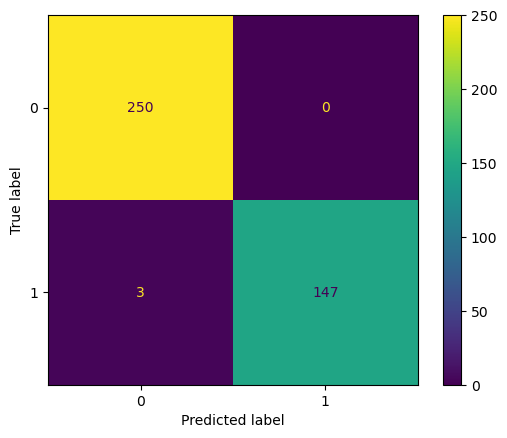

In [78]:
predictions = DT.predict(X)
cm = confusion_matrix(y, predictions, labels= DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= DT.classes_)
disp.plot()
plt.show()

# Заключение

В контрольной работе решалась задача классификации наличия хронической болезни почек пациента в зависимости от возраста, давления крови, удельного веса жидкости, уровня альбумина, сахара в крови, уровня красных кровяных телец, гнойных клеток и сгустков, бактерий, случайного уровня глюкозы, наличия мочевины, креатинина, натрия, калия в крови, уровня гемоглобина, объема клеток, числа лейкоцитов и эритроцитов, наличия гипертонии, сахарного диабета, ишемической болезни сердца, аппетита, отека стоп и анемии. 

Исходный набор данных был обработан в части установления типов данных, заполнения пропусков. Связи между факторами уровень жидкости в органах, уровень гемоглобина, объем упаковочных клеток и уровень эритроцитов и целевым признаком сильная, потому потенциально применимы модели линейного характера.

В ходе решения задачи были построены модели классификации различных типов, лучшие метрики accuracy приведены в таблице:

In [81]:
models = pd.DataFrame({
    'Model_type':['Logistic Regression', 'SVM','SVM','GaussianNB','DecisionTreeClassifier'],
     'Model':['LPR', 'LSVC',  'SVC2', 'NBG','DT'],
    'Test_score':[te_ac_LPR, te_ac_LSVC, te_ac_SVC2, te_ac_NBG,te_ac_DT],
    'Cross-val_score':[cr_ac_LPR, cr_ac_LSVC, cr_ac_SVC2, cr_ac_NBG,cr_ac_DT]
})
models.sort_values(by='Cross-val_score', ascending = False)

,Model_type,Model,Test_score,Cross-val_score
2,SVM,SVC2,0.9875,0.9950
0,Logistic Regression,LPR,0.9875,0.9900
1,SVM,LSVC,1.0000,0.9775
4,DecisionTreeClassifier,DT,0.9625,0.9750
3,GaussianNB,NBG,0.9750,0.9650


На мой вгляд, каждая из полученных моделей ввиду высокого значения метрик применима. Однако стоит учитывать возможность переобучения модели,т.к. значение на тестовом множестве стремится к 1. Сократить чрезмерную дисперсию алгоритмов можно с помощью ансамблей моделей-например, применение метода BaggingClassifier к определенной модели из приведенных.

Усреднить качество моделей возможно и с применением голосующего классификатора. Для простоты примера он был построен по моделям из таблицы, не основанным на работе конвейера:

In [95]:
VC = VotingClassifier(
    estimators = [('LSVC',SVC(kernel='linear',probability=True)),
                   ('NBG', GaussianNB(var_smoothing=1e-10)),
                   ('DT',DecisionTreeClassifier())],
    voting = 'soft')
cr_ac_VC=np.mean(cross_val_score(VC, X, y, cv = 3))
print('cross-validation accuracy= {:.4f}'.format(cr_ac_VC))

cross-validation accuracy= 0.9800


Таким образом, поставленная задача классификации решена со значеним метрики accuracy 0,97-0,99.